In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import os

In [18]:
cwd = os.getcwd()
locFilePath = os.path.join(cwd, 'InputData', 'SpatialData','ShapeFiles', 'clusteredRegions.shp')

In [6]:
shapefile = gpd.read_file(locFilePath)

In [7]:
shapefile.head()

,index,geometry
0,cluster_0,"MULTIPOLYGON (((4223496.092 2734368.143, 42236..."
1,cluster_1,"MULTIPOLYGON (((4199685.633 3404002.686, 41996..."
2,cluster_2,"MULTIPOLYGON (((4106781.295 3394915.767, 41067..."
3,cluster_3,"MULTIPOLYGON (((4602449.935 3408647.034, 46024..."
4,cluster_4,"POLYGON ((4553700.750 2730225.831, 4553786.048..."


In [8]:
len(shapefile)

8

In [9]:
shapefile['value1'] = np.random.randint(200, size=8)
shapefile['value2'] = np.random.randint(100, size=8)

In [10]:
shapefile['sum'] = shapefile['value1'] + shapefile['value2']

In [11]:
shapefile.head()

,index,geometry,value1,value2,sum
0,cluster_0,"MULTIPOLYGON (((4223496.092 2734368.143, 42236...",168,19,187
1,cluster_1,"MULTIPOLYGON (((4199685.633 3404002.686, 41996...",165,80,245
2,cluster_2,"MULTIPOLYGON (((4106781.295 3394915.767, 41067...",34,88,122
3,cluster_3,"MULTIPOLYGON (((4602449.935 3408647.034, 46024...",50,36,86
4,cluster_4,"POLYGON ((4553700.750 2730225.831, 4553786.048...",11,8,19


In [12]:
shapefile['total_degree'] = 360
shapefile['value1_degree'] = (shapefile['value1'] / shapefile['sum']) * shapefile['total_degree']
shapefile['value2_degree'] = (shapefile['value2'] / shapefile['sum']) * shapefile['total_degree']

In [13]:
shapefile.head()

,index,geometry,value1,value2,sum,total_degree,value1_degree,value2_degree
0,cluster_0,"MULTIPOLYGON (((4223496.092 2734368.143, 42236...",168,19,187,360,323.422460,36.577540
1,cluster_1,"MULTIPOLYGON (((4199685.633 3404002.686, 41996...",165,80,245,360,242.448980,117.551020
2,cluster_2,"MULTIPOLYGON (((4106781.295 3394915.767, 41067...",34,88,122,360,100.327869,259.672131
3,cluster_3,"MULTIPOLYGON (((4602449.935 3408647.034, 46024...",50,36,86,360,209.302326,150.697674
4,cluster_4,"POLYGON ((4553700.750 2730225.831, 4553786.048...",11,8,19,360,208.421053,151.578947


In [14]:
centroid = shapefile.copy()
centroid['geometry'] = centroid.geometry.centroid

In [15]:
from matplotlib.patches import Wedge
from matplotlib.collections import PatchCollection

In [16]:
import FINE as fn

(<Figure size 432x432 with 1 Axes>, <AxesSubplot:>)

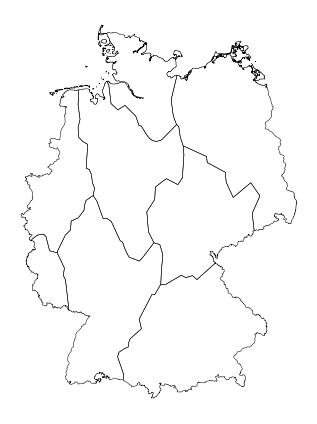

In [19]:
fn.plotLocations(locFilePath, indexColumn='index')

<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>


NameError: name 'regions' is not defined

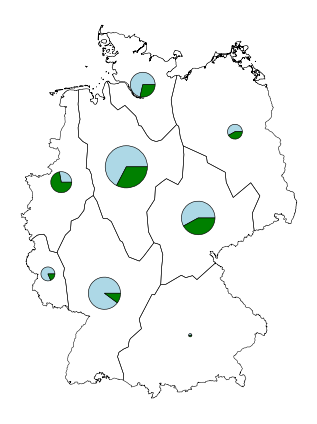

In [22]:

fig, ax = fn.plotLocations(locFilePath, indexColumn='index') #plt.subplots(figsize=(12,8))
ax.set_aspect('equal')
#regions = shapefile.plot(ax=ax, zorder=1, color='None', linewidth=0.5, alpha=0.5, edgecolor='black')
#centroid.plot(ax=regions, color='black', marker='^', markersize=5)

for index in centroid.index:
    xValue = centroid.geometry[index].x
    yValue = centroid.geometry[index].y
    print(type(xValue))
    
    pie1 = Wedge((xValue, yValue), 
                 shapefile.loc[index, 'sum']*200, # radius
                 0, # theta1
                 shapefile.loc[index,'value1_degree'], #theta2
                 fc='lightblue', lw=0.6, zorder=2, edgecolor='black')
    
    pie2 = Wedge((xValue, yValue), 
                 shapefile.loc[index, 'sum']*200, 
                 shapefile.loc[index,'value1_degree'], 
                 shapefile.loc[index,'value1_degree']+shapefile.loc[index,'value2_degree'], 
                 fc='green', lw=0.6, zorder=2, edgecolor='black')
    
    ax.add_artist(pie1)
    ax.add_artist(pie2)
    
regions.axis('off')